<a href="https://colab.research.google.com/github/Ben-tech254/SCT_DS_04/blob/main/SCT_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
#Downloading the zip file of the dataset
os.environ['KAGGLE_USERNAME'] = 'USERNAME'
os.environ['KAGGLE_KEY'] = 'KEY'

!kaggle datasets download -d sobhanmoosavi/us-accidents


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
User cancelled operation


In [3]:
#Unzipping the zip file of the dataset
!unzip /content/us-accidents.zip

Archive:  /content/us-accidents.zip
replace US_Accidents_March23.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [89]:
#Loading and reading the first 100, 000 rows of the dataset
data = pd.read_csv('/content/US_Accidents_March23.csv', nrows=100000)
data.head(10)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [90]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [91]:
#Checking for missing values
data.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,100000
End_Lng,100000
Distance(mi),0


In [92]:
#Dropping columns with a lot of missing values
data = data.drop(columns=['Wind_Chill(F)', 'Precipitation(in)', 'End_Lat', 'End_Lng'])
data.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0


In [93]:
#Filling in missing values
fill_columns = [
    'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition',
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

for col in fill_columns:
    data[col] = data[col].fillna(True)
data.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
Description,0
Street,0


In [94]:
#Check for duplicate values
data.duplicated().sum()

np.int64(0)

In [95]:
#Extracting time values (hour, day, month)
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['Hour'] = data['Start_Time'].dt.hour
data['Day'] = data['Start_Time'].dt.day_name()
data['Month'] = data['Start_Time'].dt.month_name()


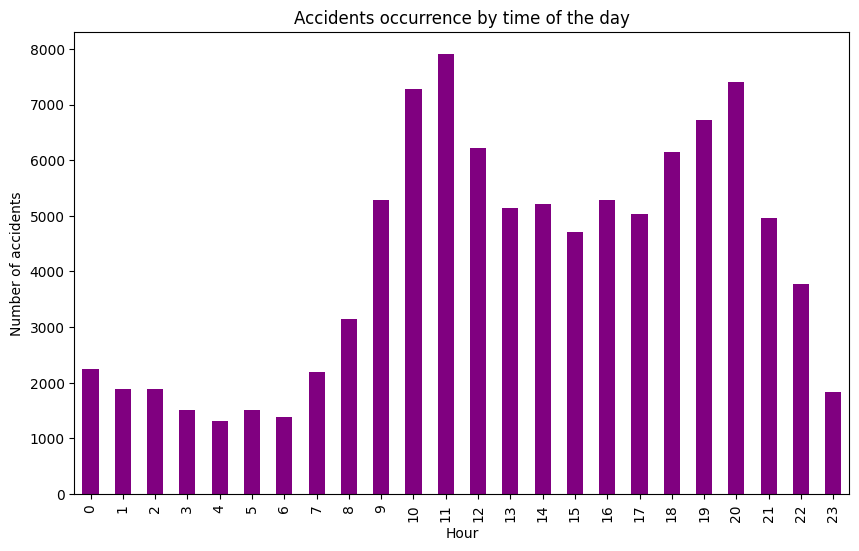

In [96]:
#Barplot for visualizing occuRrence of accidents by time of the day
time = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
time.plot(kind='bar', color = 'purple')
plt.title('Accidents occurrence by time of the day')
plt.ylabel('Number of accidents')
plt.show()

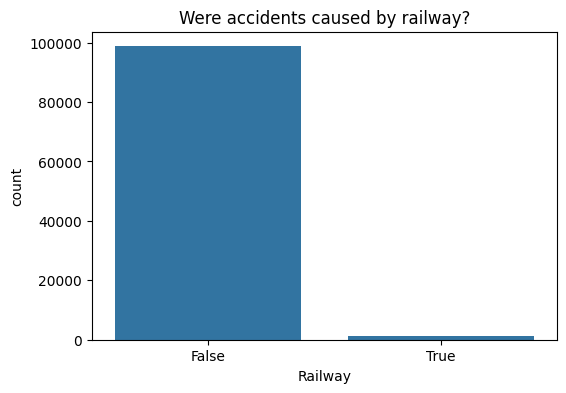

In [97]:
#A countplot for visualizing the number of accidents caused by railway
plt.figure(figsize=(6, 4))
sns.countplot(x='Railway', data=data)
plt.title('Were accidents caused by railway?')
plt.show()


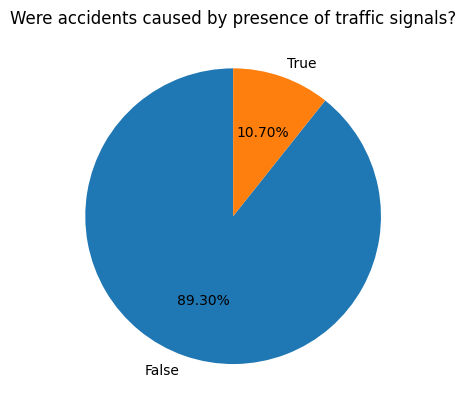

In [98]:
#A pie chart for showing the percentage of accidents that resulted from presence or absence of traffic signals
traffic = data['Traffic_Signal'].value_counts()
plt.pie(traffic, startangle = 90, autopct = '%1.2f%%', labels = traffic.index)
plt.title('Were accidents caused by presence of traffic signals?')
plt.show()

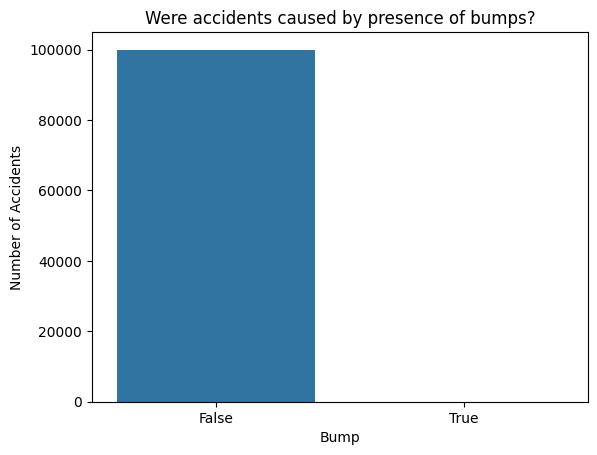

In [99]:
#A countplot to show the accidents that resulted from presence of bumps
sns.countplot(data=data, x = 'Bump')
plt.title('Were accidents caused by presence of bumps?')
plt.ylabel("Number of Accidents")
plt.show()

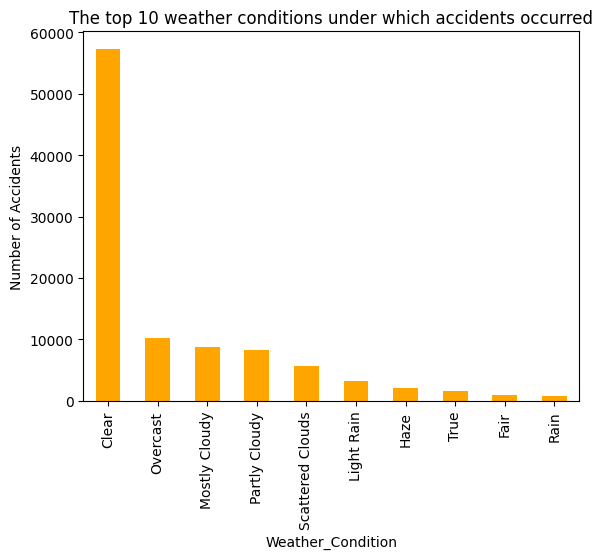

In [100]:
#Barplot showing the weather conditions that result in a high number of accidents
weather = data['Weather_Condition'].value_counts().nlargest(10)
weather.plot(kind='bar', color='orange')
plt.title("The top 10 weather conditions under which accidents occurred")
plt.ylabel("Number of Accidents")
plt.show()

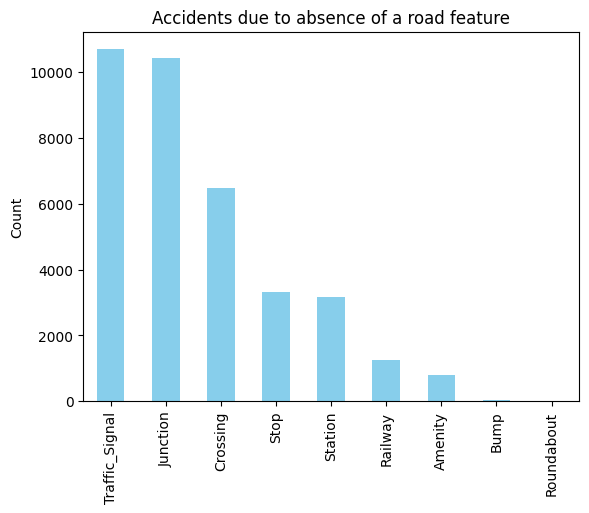

In [101]:
#Barplot showing how the absence of each road feature resulted in a high number of accidents
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal']

data[road_features].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Accidents due to absence of a road feature')
plt.ylabel('Count')
plt.show()


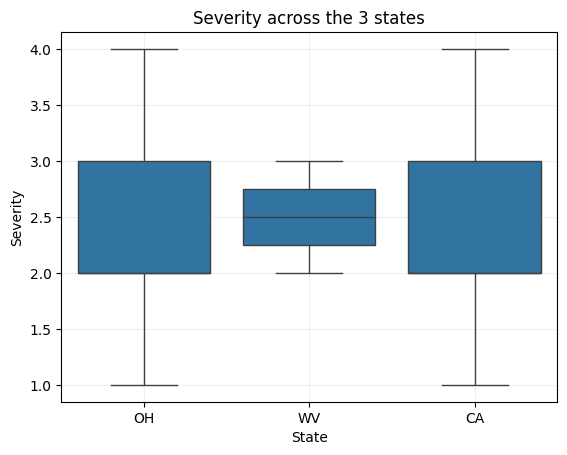

In [102]:
#Boxplot showing the severity of accidents across three different states
top_states = data['State'].value_counts().nlargest(3).index
sns.boxplot(x='State', y='Severity', data=data[data['State'].isin(top_states)])
plt.title('Severity across the 3 states')
plt.grid(alpha = 0.2)
plt.show()

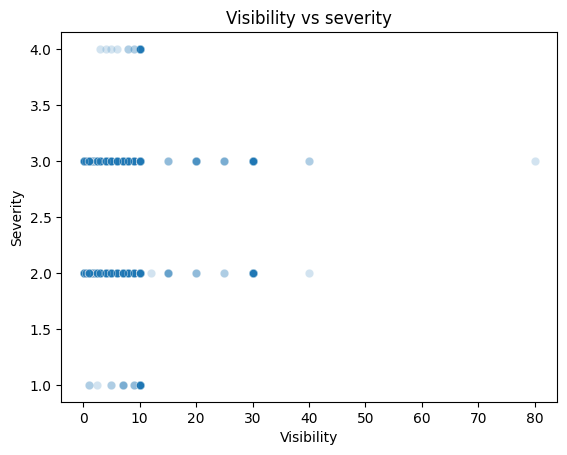

In [103]:
#Scatterplot that shows how visibility impacts the severity of the accident
sns.scatterplot(x='Visibility(mi)', y='Severity', data=data, alpha=0.2)
plt.title('Visibility vs severity')
plt.xlabel('Visibility')
plt.ylabel('Severity')
plt.show()

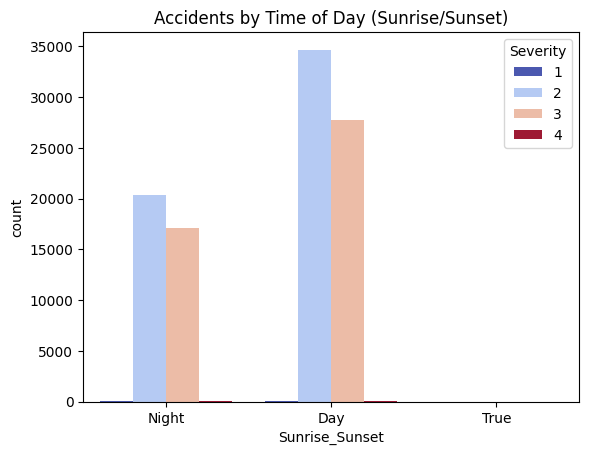

In [104]:
#Countplot showing the severity of accidents by time of the day
sns.countplot(x='Sunrise_Sunset', hue='Severity', data=data, palette='coolwarm')
plt.title('Accidents by Time of Day (Sunrise/Sunset)')
plt.show()